## First steps and intuition
We will first consider the **unforced** system. <br>
(i.e. no external forcing)<br>
From the mechanics, $\ddot{x} = -\frac{k}{m} x$<br>
The governing equation is $\ddot{x} = - \omega_0^2 x$.<br> From now on we'll forget about $k$ and $m$ as they are (mostly) irrelevant to analysing the nature of the motion. <br>
From the physical model, it looks like the solution is sinusoidal. <br>
By substituting them in, we can verify that $x = \sin{\omega_0 t}$ and $x= \cos{\omega_0 t}$ are solutions. <br>
Whether it is $\sin$ or $\cos$ depends on initial conditions $x(0)$ and $\dot{x}(0)$.<br>
Which initial conditions correspond to $\cos{\omega_0 t}$? <br>
$\omega_0$ is called the **angular frequency** of the oscillation. <br>
This means there are $\omega$ periods completed every $2\pi$ radians.<br>
For example, for $\omega_0 = 3$ or $\omega_0 =5$:

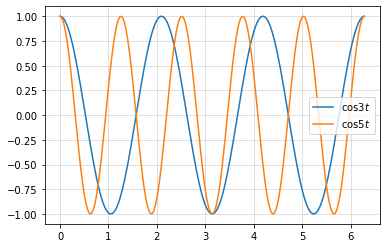

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0,2*np.pi,200)
plt.plot(t, np.cos(3*t), label="$\cos{3t}$")
plt.plot(t, np.cos(5*t), label="$\cos{5t}$")
plt.grid(alpha=0.5)
plt.legend()


## Numerical solution.
To solve $\dot{y} = f(y, t)$, the Euler method states that:<br>
$t_{n+1} = t_n + h$<br>
$y_{n+1}=y_{n}+hf(y_n, t_n)$<br> (think of the RHS as $y_n + dt \times \frac{dy}{dt}$)<br>
In other words, a forward step consists of: <br>
To find the new time, add $h$ to the current time. ($h$ is the time interval between each step)<br>
To find the new $y$, add $h$ times the current gradient.<br>
Note that the above formula comes from discretization of first principles formula: $\frac{y_{n+1}-y_n}{h} \approx f(y_n, t_n)$.<br>
This formula becomes equality in the limit $h\rightarrow 0$.<br>
Let's run Euler method on a toy problem first:<br>
$\dot{y} = y, y(0)=1$. What is the solution?<br>
Choose $h=.5$ to start.<br>
$t_0 = 0, y_0 = 1$<br>
$t_1 = .5, y_1 = 1 + .5\times1 = 1.5$<br>
$t_2 = 1, y_2 = 1.5 + .5\times1.5 = 2.25$<br>
Writing a program to plot the table for us leads to:

t =  0.0 , x =  1.0
t =  0.5 , x =  1.5
t =  1.0 , x =  2.25
t =  1.5 , x =  3.375
t =  2.0 , x =  5.0625
t =  2.5 , x =  7.59375
t =  3.0 , x =  11.390625
t =  3.5 , x =  17.0859375
t =  4.0 , x =  25.62890625
t =  4.5 , x =  38.443359375


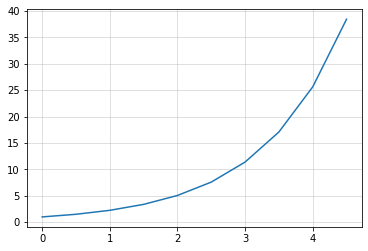

In [4]:
def eulerstep(t, y, f, h):#execute one step of euler method
    return y + h*f(y,t)

def euler(T, f, h, table=True):#run euler method for a certain range of time, starting at t=0
    N = int(T/h) #num steps
    t = np.zeros((N))
    y = np.zeros((N))
    y[0] = 1 #initial condition
    if table:
        print("t = ", t[0], ", x = ", y[0]) #print initial condition
    for i in range(0,N-1):
        t[i+1] = t[i] + h
        y[i+1] = y[i] + h*y[i]
        if table:
            print("t = ", t[i+1], ", x = ", y[i+1])
    return t,y

def f(y,t):
    return y #the equation is y' = f(y,t) = y in this case.

T = 5 #max time
h = 0.5 #timestep
    
t,y = euler(T, f, h)
plt.plot(t,y)
plt.grid(alpha=0.5)

How close is this to the real solution, $y=e^t$?

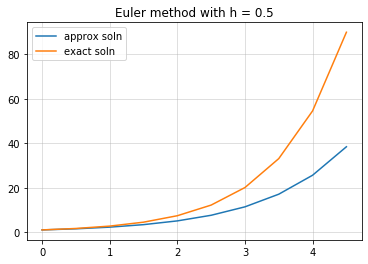

In [87]:
plt.plot(t,y,label='approx soln')
plt.plot(t,np.exp(t),label='exact soln')
plt.grid(alpha=0.5)
plt.title('Euler method with h = '+str(np.around(h,3)))
plt.legend()

Not great, but if we reduce $h$ to $0.05$ (while keeping the same range of $t$, thus increasing number of steps)

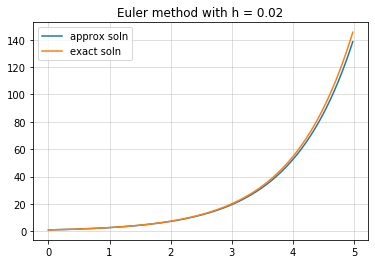

In [5]:
T = 5
h = 0.02

t,y = euler(T, f, h, table=False)#recall, the middle argument is f(y,t), an expression for the first derivative

plt.plot(t,y,label='approx soln')
plt.plot(t,np.exp(t),label='exact soln')
plt.grid(alpha=0.5)
plt.title('Euler method with h = '+str(np.around(h,3)))
plt.legend()

## Euler method for SHM
Back to our equation $\ddot{x}= -\omega_0^2 x$.<br>
To solve $\dot{y} = f(y, t)$, the Euler method states that:<br>
$t_{n+1} = t_n + h$<br>
$y_{n+1}=y_{n}+hf(y_n, t_n)$<br>
This is a first order method! Can it be used to solve a second order DE? Yes!<br><br>
Write $y=\dot{x}$, then we have: <br>
$\dot{y} = -\omega_0^2 x$ <br>
$\dot{x} = y$<br>
Then Euler's equations become: <br>
$t_{n+1} = t_n + h$<br>
$y_{n+1}=y_{n}+h\times-\omega_0^2 x$<br>
$x_{n+1}=x_{n}+h\times y$<br>
Let's write some code with the initial condition $x(0)=1, \dot{x}(0)=0$. What solution does this correspond to?

The reason why the Euler method diverges is the transfer matrix
 [['1' '-hw^2']
 ['h' '1']] 
 has determinant larger than unity.


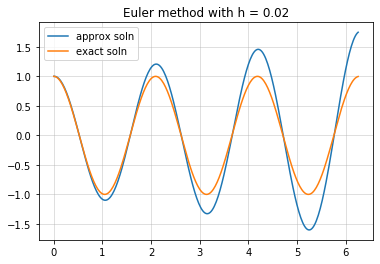

In [6]:
h = 0.02
T = 2*np.pi
N = int(T/h) #num steps
t = np.zeros((N))
y = np.zeros((N))
x = np.zeros((N))

#print("t = ", t[0], ", y = ", y[0]) #print initial condition

y[0] = 0; x[0] = 1
omega_0 = 3 #angular freq 3

for i in range(0,N-1):
    t[i+1] = t[i] + h
    x[i+1] = x[i] + h*y[i]
    y[i+1] = y[i] + h*-omega_0**2*x[i]
    

plt.plot(t,x,label='approx soln')
plt.plot(t,np.cos(3*t),label='exact soln')
plt.grid(alpha=0.5)
plt.title('Euler method with h = '+str(np.around(h,3)))
plt.legend()
M = np.array([['1','-hw^2'],['h', '1']])
print("The reason why the Euler method diverges is the transfer matrix\n",M,"\n has determinant larger than unity.")

Since we have two variables: $x$ and $y=\dot{x}$, why not plot them on the same axes? What do you think it will look like?

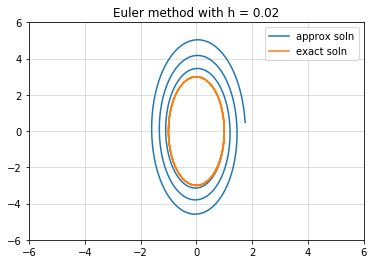

In [17]:
plt.axis((-6,6,-6,6))
plt.plot(x,y,label='approx soln')
plt.plot(np.cos(3*t), -3*np.sin(3*t),label='exact soln')
plt.grid(alpha=0.5)
plt.title('Euler method with h = '+str(np.around(h,3)))
plt.legend()

Notice that Euler method solution violates conservation of energy: both position and velocity increase, indicating an overall increase in kinetic and potential energy. This is fixed if h is made small, but will always be a problem. This can be circumvented by using implicit or higher order methods.

## Using matrices.
Recall we're solving:<br>
$\dot{x} = y$<br>
$\dot{y} = -\omega_0^2 x$ <br>
Let $\textbf{x} = \begin{bmatrix}x\\y\end{bmatrix}$. Then we have: <br>
$\dot{\textbf{x}} = \begin{bmatrix}0 & 1 \\ -\omega_0^2 & 0\end{bmatrix}\textbf{x}$ <br>
Hang on, this looks a lot like $\dot{y} = \lambda y$, for which the solution is $y=y_0 e^{\lambda t}$.<br>
Could the solution to our problem possibly be $\textbf{x} = e^{ \begin{bmatrix}0 & 1 \\ -\omega_0^2 & 0\end{bmatrix} t}\textbf{x}_0$?<br>
It turns out the answer is **yes**, but what does the exponential of a matrix even mean?<br>
You need the identity $e^x = 1 + x + \frac{x^2}{2!}+ \frac{x^3}{3!} +...$, which I'll get you to prove in the exercises.<br>
We can certainly take successive powers of the matrix to get an infinite series, hopefully which converges to something in terms of sines and cosines. It works out if you work through it!


## Harmonic analysis, Fourier Transform.
The word 'harmonic' in the phrase 'harmonic oscillator' is indeed related to music. <br>
We don't hear in the time domain, we hear in the frequency domain. <br>
Consider two different notes being played: one with $\omega=3$, one with $\omega=5$.<br>
The one with angular frequency $5$ will have half the amplitude (i.e. will be quieter) <br>
From the time domain plot, it is not at all obvious that there are exactly two frequencies being played: <br>

There's a function for this called fft. Let's just take the fft of our previous solution and see what we get:

In [ ]:
plt.plot(np.fft.fft(x)[0:20],label='approx')
x_exact = np.cos(3*t)
plt.plot(np.arange(20),np.fft.fft(x_exact)[0:20], label='exact')
plt.xticks(np.arange(0,18))
plt.legend()
plt.title("I've plot discrete data on a continuous line graph!")
plt.grid(alpha=0.4)
print("We don't need to worry about the line graph because for large $n$, the discrete fourier transform approximates the continuous fourier transform, and we're only interested in qualitative analysis at this stage.")

In [ ]:
t = np.linspace(0,2*np.pi,100)
z = np.sin(3*t)+.5*np.sin(5*t)
plt.plot(t,z)
plt.title('What are the frequency components of this signal?')
print("It's hard to tell from a time domain plot")

But if we plot the magnitude of the Discrete Fourier Transform of the above:

Text(0.5, 1.0, 'Once a Fourier Transform is applied, we see the magnitudes of each frequency component.')

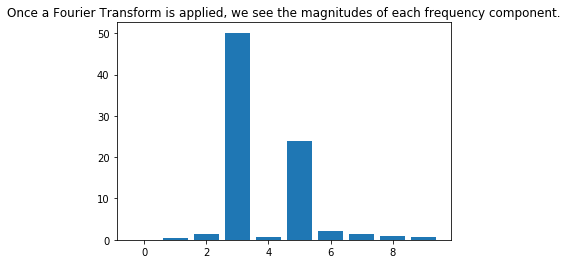

In [32]:
plt.bar(np.arange(0,10),np.abs(np.fft.fft(z))[:10])
plt.title("Once a Fourier Transform is applied, we see the magnitudes of each frequency component.")

We see that the signal clearly has two frequency components at $\omega=3$ and $\omega=5$. <br>
We also the the signal has a larger component at angular frequency $3$.<br>
What happens if we Fourier Transform a square wave?

<BarContainer object of 50 artists>

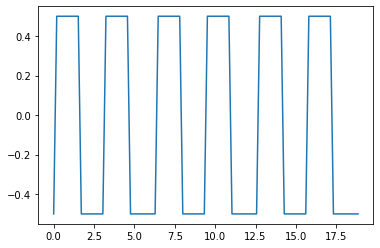

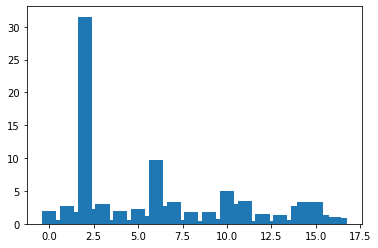

In [69]:
t = np.linspace(0,6*np.pi,100)
z = np.ceil(np.sin(2*t))-.5
plt.plot(t,z)
plt.figure()
plt.bar(np.arange(0,50)/3,(np.abs(np.fft.fft(z))[:50]))

We see the fundamental frequency at 3 $2\pi/\text{Hz}$, and then **harmonics** at every multiple of that. <br>
This means the square wave is the sum of a sine wave plus various fractions of its harmonic **overtones**.

## Now go back to the simulation with this new knowledge!
Can you make more sense of the phase plots and frequency domain plots now? <br>
The initial conditions are by default $x(0)=\dot{x}(0)$ in the simulation.

## Activity 3: Linking matrices, exponentials and complex numbers.
Our goal is to show that the solution to <br>
$\dot{\textbf{x}} = \begin{bmatrix}0 & 1 \\ -1 & 0\end{bmatrix} \textbf{x}$ , $\textbf{x}_0 = \begin{bmatrix}1\\0\end{bmatrix}$ equation (1)<br>
is $\textbf{x} = \begin{bmatrix}\cos{t} \\ -\sin{t}\end{bmatrix}$.<br>
**Note** This corresponds to the case $\omega_0=1$.<br> A system with natural angular frequency 1 oscillating freely.<br>
1. Prove that $f(x) = f(0)+f'(0)x+f''(0)\frac{x^2}{2!}+f'''(0)\frac{x^3}{3!}...$ (Maclaurin series).<br> To do this, start by assuming $f(x) = a_0+a_1x+a_2x^2+a_3x^3+...+a_n x^n+...$. <br>Set $x=0$ to find $a_0$. Then differentiate. Then set $x=0$ again. Proceed by spotting a pattern, or using induction.<br><br>
1. Set $f(x)=e^x$ in Maclaurin series to show that $e^x = 1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+...$. Find the Maclaurin series for $\cos{x}$ and $\sin{x}$.<br> What values of $x$ is the series expansion valid for? <br><br>
1. Prove using the series that $e^{ix} = \cos{x}+i\sin{x}$, hence that $e^{i\pi}=-1$. What about $i^i$?<br><br>
1. Let $\textbf{J} = \begin{bmatrix}0 & 1 \\ -1 & 0\end{bmatrix}$. Find $\textbf{J}^2, \textbf{J}^3, \textbf{J}^4$.<br> Notice how this corresponds to powers of the complex number $i$? <br>The matrix $\textbf{J}$ very much behaves like the complex number $i$, under the operation of multiplication. Can you make more explicit the correspondence between complex numbers and a subset of 2x2 matrices?<br><br>
1. Use the fact that the solution to $\dot{y}= \lambda y$ is $y=y_0 e^{\lambda t}$ to solve equation (1).<br><br>
1. Bonus: solve the equation $\textbf{M}^3 = \textbf{I}$, where $\textbf{M}$ is a 2x2 matrix to find and $\textbf{I}$ is the identity matrix in 2D.

## Activity 2: Error analysis of Euler's method.
We've used Euler's method. But how to quantify the error? <br>
It turns out, Euler's method is a first order method, which means the error will be quadratic in $h$.<br>
This means that any error terms will contain a power of $h^2$, $h^3$, or higher powers of $h$. <br>
These terms are very small compared to terms of order $h$. <br>
1. Prove that $f(x) = f(0)+f'(0)x+f''(0)\frac{x^2}{2!}+f'''(0)\frac{x^3}{3!}...$ (Maclaurin series).<br> To do this, start by assuming $f(x) = a_0+a_1x+a_2x^2+a_3x^3+...+a_n x^n+...$. <br>Set $x=0$ to find $a_0$. Then differentiate. Then set $x=0$ again.<br> Proceed by spotting a pattern, or using induction.<br><br>
1. Set $f(x)=e^x$ in Maclaurin series to show that $e^x = 1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+...$.<br>You'll use this in the next part.<br><br>
1. Given $\dot{y}=\lambda{y}, y(0)=y_0$, find the exact value of $y$ at $t=h$.<br> Write this as a series expansion in powers of $h$.<br><br>
1. Use Euler's method: $y(t_{n+1})= y(t_n)+f(y(t_n), t_n)$ to find the approximate solution at $t=h$.<br><br>
1. By considering the difference between the exact and approximate solutions, show that the error is $O(h^2)$. In other words, all error terms contain a power of $h^2$ or higher.<br><br>
1. Investigate the error at the second time step, i.e. the difference between the approx. and exact solutions when $t=2h$.<br> <br>
1. Prove that the trapezoidal method $y(t_{n+1})= y(t_n)+\frac{1}{2}(f(y(t_n),t_n)+f(y(t_{n+1}),t_{n+1})$ is a second order method for the equation $\dot{y}=\lambda{y}$, $y(0)=y_0$. You can let $\lambda=1$ if you'd like to try a simpler problem!

## Activity 1: Solve the unforced equation with algebra.

Solve equation $\frac{d^2x}{dt^2}=-\omega^2 x$ using the following method.<br>

Note that we have written $\ddot{x}= \frac{d^2x}{dt^2}$. This is purely a change of notation.<br>
1. Let $y= \frac{dx}{dt}$. By writing $\frac{dy}{dt}=\frac{dy}{dx} \frac{dx}{dt}$, Show that $\frac{d^2 x}{dt^2} = y \frac{dy}{dx}$.
1. Substitute this expression for $\frac{d^2x}{dt^2}$ into the original equation, to show that $y=\pm \sqrt{k^2-\omega^2 x^2}$, where $k$ is a constant of integration.
1. Now write $y= \frac{dx}{dt}$, and solve for $x(t)$. <br> You might find a substitution of the form $x = a \sin{\theta}$ useful here.
1. Obtain the solution $x= A \sin(\omega t + \phi)$, where $A$ and $phi$ are constants of integration.
1. Expand this with the compound angle formula to obtain the general solution $x = A \cos{\omega t}+B \sin{\omega t}$.
1. Investigate the damped equation $\frac{d^2x}{dt^2}+b\frac{dx}{dt}=-\omega^2 x$.


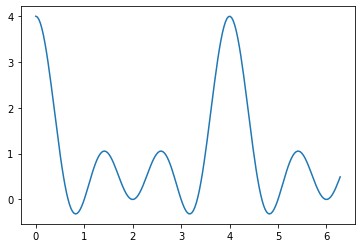

In [7]:
ff = lambda x: 1+np.exp(2*1j*np.pi*1/4*x)+np.exp(2*1j*np.pi*2/4*x)+np.exp(2*1j*np.pi*3/4*x)
plt.plot(t, ff(t).real)

The reason why the Euler method diverges is the transfer matrix
 [['1' '-hw^2']
 ['h' '1']] 
 has determinant larger than unity.


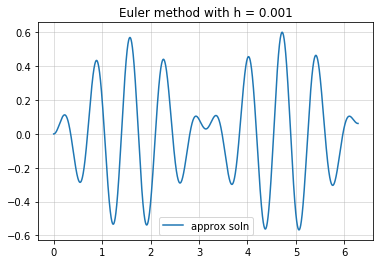

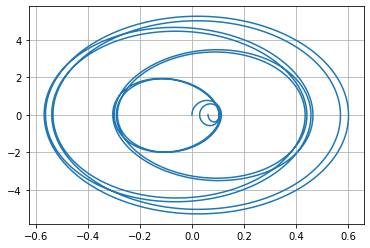

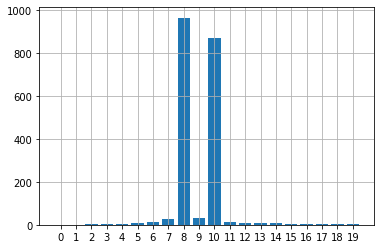

In [52]:
h = 0.001
T = 2*np.pi
N = int(T/h) #num steps
t = np.zeros((N))
y = np.zeros((N))
x = np.zeros((N))
f = np.zeros((N))

#print("t = ", t[0], ", y = ", y[0]) #print initial condition

y[0] = 0; x[0] = 0
omega_0 = 8 #angular freq 8
omega_f = 10 #forcing freq 8
A = 0.01 #forcing amplitude

for i in range(0,N-1):
    f[i] = A*np.cos(omega_f*t[i])
    
    t[i+1] = t[i] + h
    x[i+1] = x[i] + h*y[i]
    y[i+1] = y[i] + h*-omega_0**2*x[i] + f[i]
    

plt.plot(t,x,label='approx soln')
#plt.plot(t,np.cos(3*t),label='exact soln')
plt.grid(alpha=0.5)
plt.title('Euler method with h = '+str(np.around(h,3)))
plt.legend()
M = np.array([['1','-hw^2'],['h', '1']])
print("The reason why the Euler method diverges is the transfer matrix\n",M,"\n has determinant larger than unity.")

plt.figure()
plt.plot(x,y)
plt.grid()

plt.figure()
fft = np.fft.fft(x)
plt.bar(np.arange(0,20), np.abs(fft[:20]))
plt.xticks(np.arange(0,20))
plt.grid()

In [54]:
import mpl3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

ModuleNotFoundError: No module named 'mpl3'